In [10]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline











import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")




column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv(os.path.join(path, os.listdir("/Users/notagain/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1")[0]), header=None, delimiter=r"\s+", names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.shape

(506, 14)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV', axis = 1),df['MEDV'],test_size = .2)


In [14]:
sel = VarianceThreshold(threshold = 1e-06)
sel.fit(X_train)

VarianceThreshold(threshold=1e-06)

Text(0.5, 0, 'Features axis')

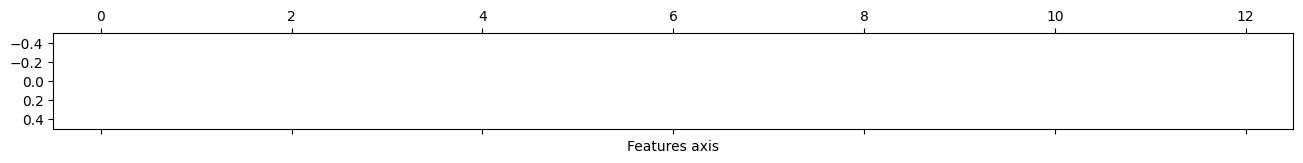

In [17]:
mask = sel.get_support()

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')
plt.xlabel('Features axis')

In [18]:
# Get original feature names
original_features = X_train.columns  # Ensure X_train is a DataFrame

# Get boolean mask of selected features
selected_features_mask = sel.get_support()

# Get names of selected features
selected_features = original_features[selected_features_mask]

# Get names of removed features
removed_features = original_features[~selected_features_mask]

print("Deleted Features:")
print(removed_features)


Deleted Features:
Index([], dtype='object')


Text(0.5, 0, 'Features axis')

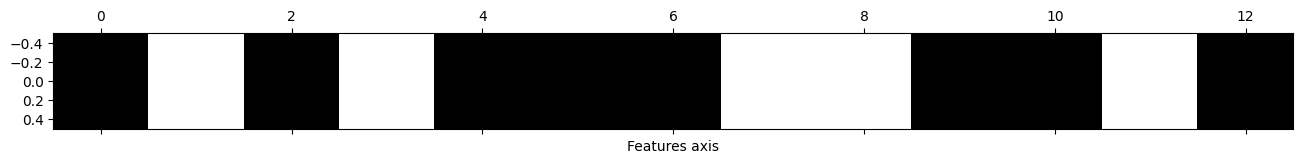

In [19]:
sel = SelectKBest(score_func = f_regression, k=8)
sel.fit(X_train, y_train)
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Features axis')

Text(0.5, 0, 'Feature axis')

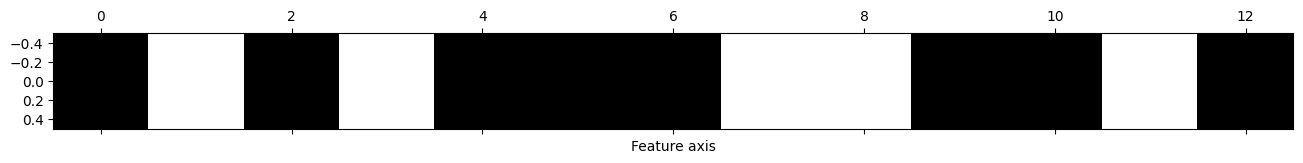

In [20]:
sel = SelectKBest(score_func = mutual_info_regression, k=8)
sel.fit(X_train, y_train)
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature axis')

Text(0.5, 0, 'Features axis')

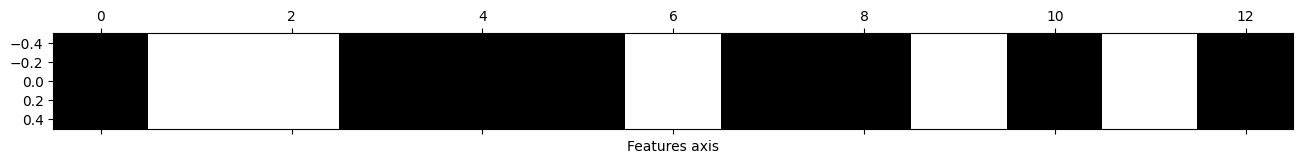

In [21]:
lm = LinearRegression()
rfe = RFE(estimator=lm, step=1, n_features_to_select = 8)
rfe.fit(X_train, y_train)

mask = rfe.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Features axis')

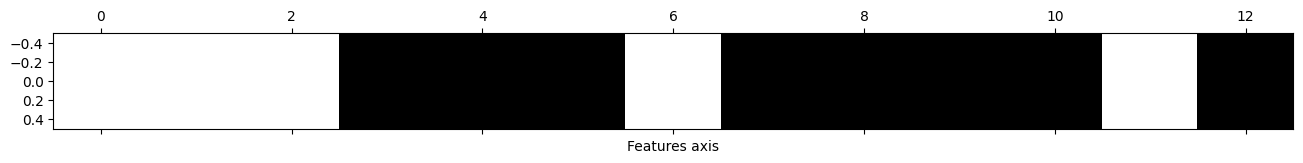

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


rfe = RFE(estimator=lm, step=1, n_features_to_select = 8)
rfe.fit(X_train, y_train)

mask = rfe.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Features axis')
plt.show()

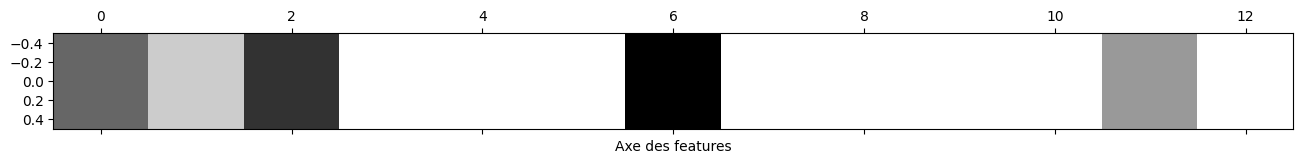

In [23]:
ranking = rfe.ranking_
plt.matshow(ranking.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features')
plt.show()

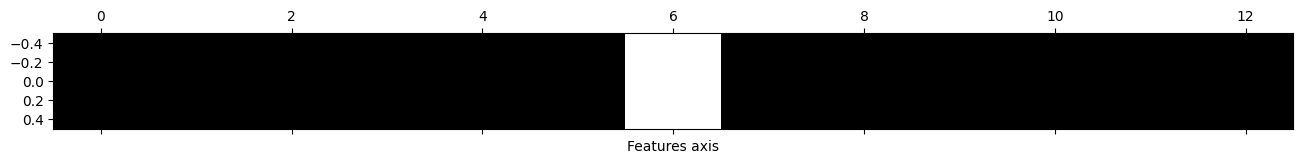

In [24]:
crossval = KFold(n_splits = 5, random_state = 2, shuffle = True)
rfecv = RFECV(estimator=lm, cv = crossval, step=1)
rfecv.fit(X_train, y_train)

mask = rfecv.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Features axis')
plt.show()

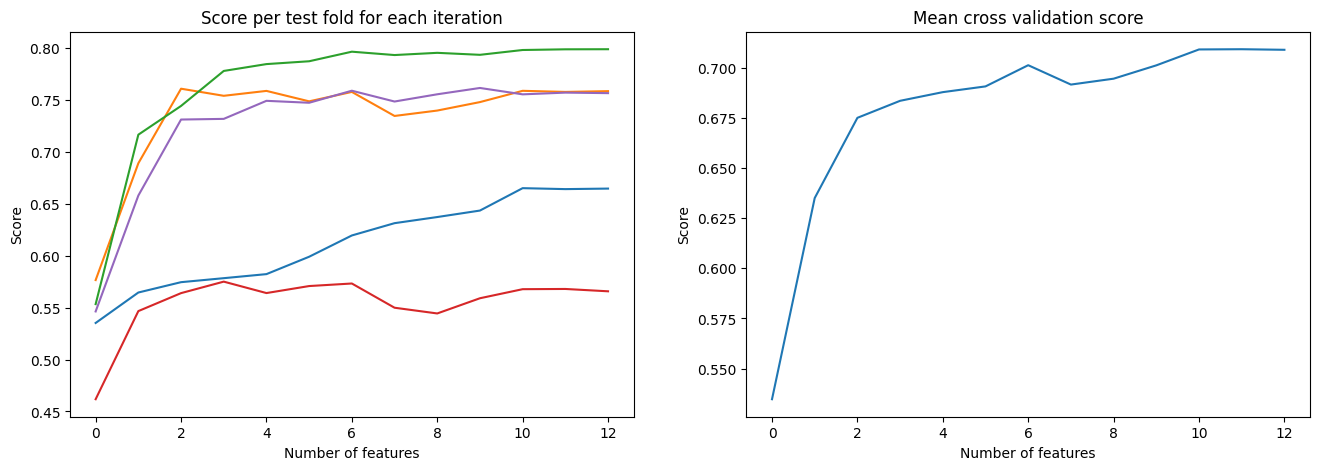

Nymber of features selected : 12


In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

for i in range(5):
    ax1.plot(rfecv.cv_results_[f'split{i}_test_score'])
ax1.set_xlabel('Number of features')
ax1.set_ylabel('Score')
ax1.set_title('Score per test fold for each iteration')
    
ax2.plot(rfecv.cv_results_['mean_test_score'])
ax2.set_xlabel('Number of features')
ax2.set_ylabel('Score')
ax2.set_title('Mean cross validation score')

plt.show();

print("Nymber of features selected :", rfecv.n_features_)

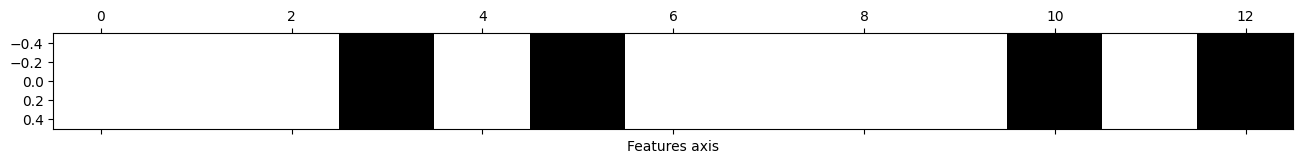

In [26]:
lasso = Lasso(alpha = 1)
model = SelectFromModel(estimator = lasso, threshold = 1e-10)
model.fit(X_train, y_train)

mask = model.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Features axis')
plt.show()


In [27]:
alpha_grid = {'alpha':[1/i for i in range(1,10)]}
grid = GridSearchCV(estimator = lasso, param_grid = alpha_grid, cv=crossval, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 0.1111111111111111}


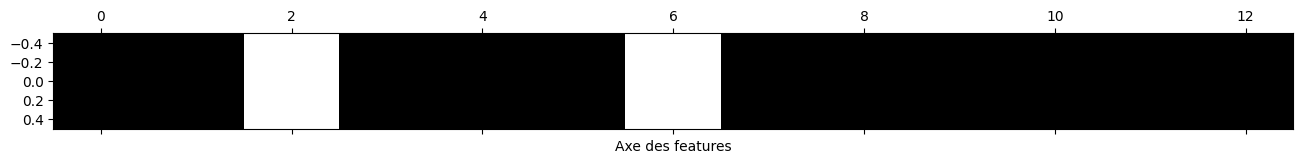

In [28]:
sel = SelectFromModel(estimator = grid.best_estimator_, threshold = 1e-10, prefit = True)
mask = sel.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features')
plt.show()
